# Introduction to scikit-learn

In [27]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [29]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asus\AppData\Local\Temp\ipykernel_16436\3257800236.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [30]:
X, y = data, target

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [32]:
mod = KNeighborsRegressor()

In [33]:
mod.fit(X, y)

KNeighborsRegressor()

In [34]:
y_pred = mod.predict(X)

In [35]:
x = np.array(range(len(y)))

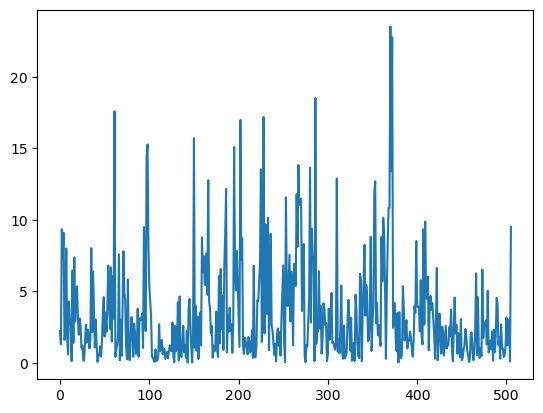

In [36]:
plt.plot(x, np.abs(y - y_pred))

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
mod = LinearRegression()

In [39]:
mod.fit(X, y)

LinearRegression()

In [42]:
y_pred = mod.predict(X)

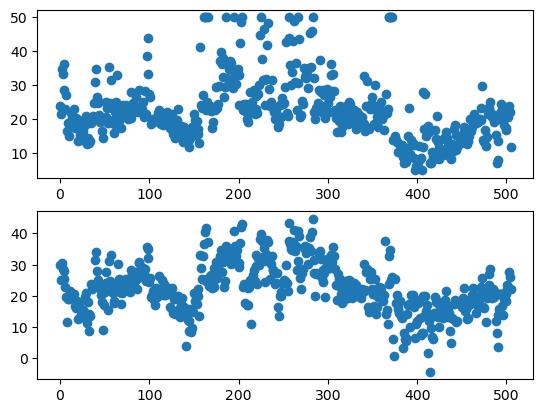

In [43]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].scatter(x, y)
ax[1].scatter(x, y_pred)

In [46]:
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)

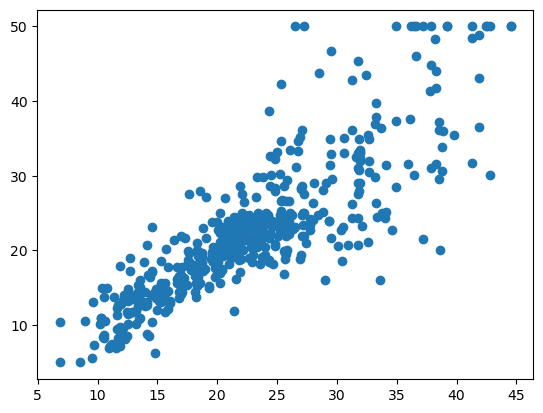

In [50]:
plt.scatter(pred, y)

Giả sử ta có một bộ dữ liệu với trục y có giá trị từ 0-3 dặm, còn trục x thì có giá trị từ 0-3000 m^2. Việc giá trị của trục x quá chênh lệch so với giá trị của trục y có thể dẫn những kết quả không mong muốn do trục x có tác động lớn vào đầu ra. Do vậy ta cần phải scale lại các giá trị đầu vào

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [61]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=5))])

Ta đang đi xây dựng một pipeline. Đầu tiên ta scale lại dữ liệu đầu vào X, sau đó ta áp dụng K-Nearest Regression

In [65]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [67]:
pred = pipe.predict(X)

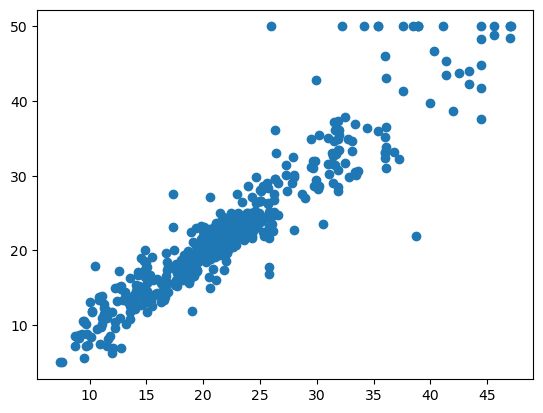

In [69]:
plt.scatter(pred, y)

Ta thấy sau khi scale thì ta nhận được kết quả tốt hơn

Nhưng khi ta chỉnh k = 1 thì điều gì sẽ xảy ra?

In [73]:
pipe = Pipeline([('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=1))])

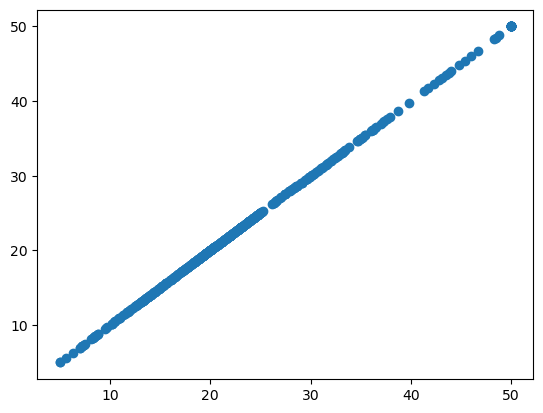

In [75]:
pipe.fit(X, y)
pred = pipe.predict(X)
plt.scatter(pred, y)

Woahla! Thuật toán K-NearestNeighbors Regression sẽ dự đoán đầu ra của một điểm dữ liệu dựa trên thông tin về K điểm dữ liệu gần nhất. Nghĩa là khi ta dự đoán đầu ra của một điểm dữ liệu trong tập test thì ta cần dựa vào thông tin của K điểm dữ liệu gần nó nhất (dĩ nhiên K điểm này đều nằm trong tập train). Ở trên, ta dùng chính dữ liệu huấn luyện để test, nên khi ta lấy một điểm dữ liệu trong đó, thì chắc chắn sẽ bị trùng với một điểm trong tập huấn luyện (do ta lấy luôn tập huấn luyện làm tập test). Khi K = 1, thì mô hình lấy luôn đầu ra của điểm dữ liệu gần nhất để đoán, trong khi điểm dữ liệu gần nhất của một điểm trong tập test chính là nó. Thuật toán K-NearestNeighbors thường dễ bị overfitting khi K nhỏ.

Vậy làm thế nào để ta biết nên chọn giá trị nào cho K trong thuật toán trên?

In [79]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=1))])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

Dòng mã này sử dụng GridSearchCV trong scikit-learn để tìm kiếm các tham số tốt nhất cho mô hình học máy. Dưới đây là giải thích chi tiết về từng thành phần trong dòng mã:

mod = GridSearchCV(...): Tạo một đối tượng GridSearchCV, một công cụ để tự động hóa việc tìm kiếm các tham số tốt nhất cho một mô hình học máy bằng cách thử tất cả các kết hợp của các tham số được cung cấp và đánh giá chúng thông qua kỹ thuật cross-validation.

estimator = pipe: Đối tượng pipe là một pipeline (dòng chảy) mà bạn đã định nghĩa trước đó. Pipeline này thường bao gồm các bước tiền xử lý dữ liệu và một mô hình học máy ở cuối.

param_grid = {'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}: param_grid là một từ điển chứa các tham số mà bạn muốn tìm kiếm. Ở đây, model__n_neighbors ám chỉ tham số n_neighbors của mô hình học máy. Ký hiệu model__n_neighbors sử dụng trong trường hợp bạn đang sử dụng một pipeline và model là tên của bước mô hình học máy trong pipeline đó. Danh sách [1,2,3,4,5,6,7,8,9,10] là các giá trị của n_neighbors mà GridSearchCV sẽ thử.

cv=3: Số lần cross-validation. Ở đây cv=3 nghĩa là dữ liệu sẽ được chia thành 3 phần, và mô hình sẽ được đào tạo và đánh giá 3 lần (mỗi lần trên 2 phần dữ liệu đào tạo và 1 phần dữ liệu kiểm tra khác nhau).

In [82]:
mod = GridSearchCV(estimator = pipe, param_grid = {'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}, cv=3)
mod

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [84]:
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [86]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001345,4.633778e-04,0.001322,4.552422e-04,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.000998,5.237979e-06,0.001031,7.037895e-05,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000972,4.343597e-05,0.001003,5.944017e-06,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000996,3.212513e-06,0.001000,2.247832e-07,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.000667,4.714266e-04,0.000667,4.714266e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000363,5.129552e-04,0.001092,1.335327e-04,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000979,4.400658e-05,0.000996,4.608055e-06,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000330,4.672119e-04,0.001334,4.705279e-04,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000397,5.612836e-04,0.001667,4.716514e-04,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001000,1.946680e-07,0.001000,1.123916e-07,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [88]:
mod.best_params_, mod.best_score_

({'model__n_neighbors': 3}, 0.4028999056899609)

Ta thấy K cho giá trị tốt nhất là 3

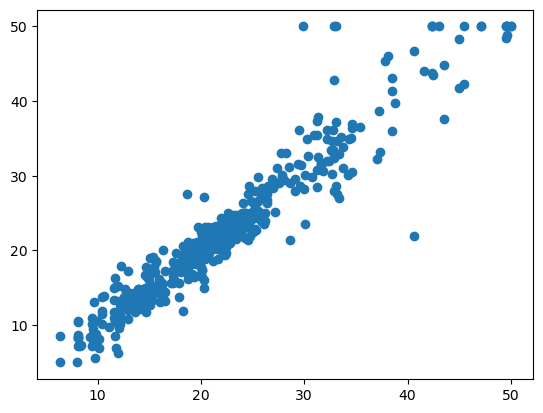

In [91]:
pipe = Pipeline([('scale', StandardScaler()), ('model', KNeighborsRegressor(n_neighbors=3))])
pipe.fit(X, y)
pred = pipe.predict(X)
plt.scatter(pred, y)

In [93]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [95]:
data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1)

In [97]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Data preprocessing

In [100]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

df = pd.read_csv('drawndata1.csv')

In [102]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [104]:
X = df[['x','y']].values
y = df['z'] == 'a'

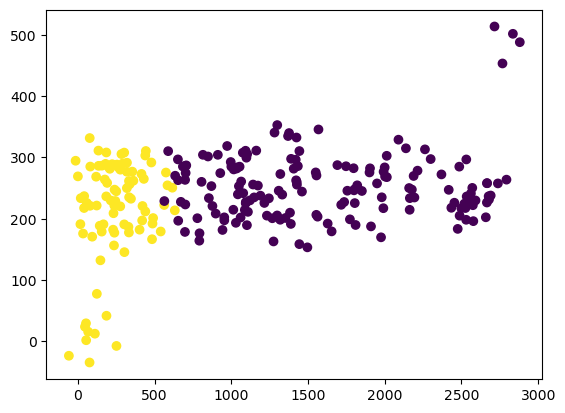

In [106]:
plt.scatter(X[:,0], X[:,1], c=y)

Ta thấy giá trị ở 2 trục khá chênh lệch so với nhau, vậy ta sẽ cần phải scale lại chúng

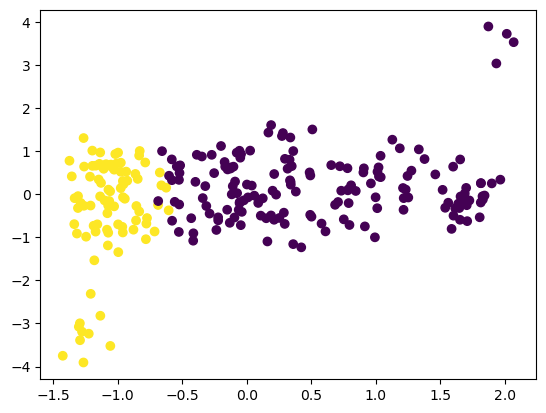

In [109]:
from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y)

Với mỗi giá trị x, ta tính mean, variance, sau đó biến x thành (x - mean) / variance, và ta được dữ liệu mới X_new như trên, với khoảng giá trị đã được thu hẹp lại.

Nhưng các giá trị ngoại lai (cụm ở góc dưới bên trái và góc trên bên phải) vẫn còn tồn tại.

In [113]:
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, 1000)

(array([121., 212., 172., 129.,  95.,  49.,  64.,  33.,  40.,  11.,  17.,
          7.,  17.,   9.,   6.,   1.,   7.,   2.,   1.,   0.,   3.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([-1.61179094,  1.36773282,  4.34725657,  7.32678033, 10.30630409,
        13.28582784, 16.2653516 , 19.24487535, 22.22439911, 25.20392287,
        28.18344662, 31.16297038, 34.14249413, 37.12201789, 40.10154165,
        43.0810654 , 46.06058916, 49.04011291, 52.01963667, 54.99916042,
        57.97868418, 60.95820794, 63.93773169, 66.91725545, 69.8967792 ,
        72.87630296, 75.85582672, 78.83535047, 81.81487423, 84.79439798,
        87.77392174]),
 <BarContainer object of 30 artists>)

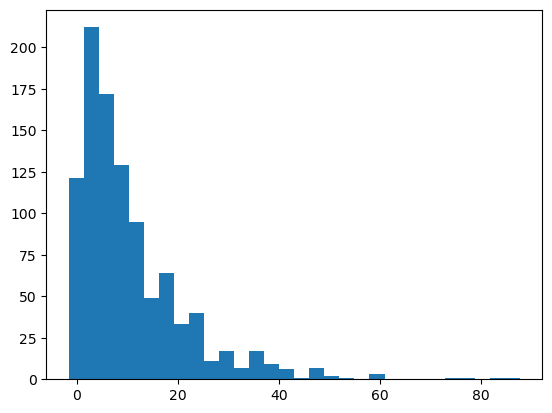

In [115]:
plt.hist(x, 30) 

Để khắc phục ảnh hưởng của các giá trị ngoại lai, ta sử dụng QuantileTransformer

QuantileTransformer hoạt động bằng cách ánh xạ các dữ liệu gốc sang các giá trị thứ hạng (quantiles) của một phân phối mục tiêu, thường là phân phối chuẩn (normal distribution) hoặc phân phối đều (uniform distribution).

Các bước mà QuantileTransformer thực hiện:

+ Tính toán thứ hạng: Xếp hạng các giá trị của từng đặc trưng.

+ Ánh xạ thứ hạng sang phân phối mục tiêu: Chuyển đổi các giá trị thứ hạng sang các giá trị tương ứng trong phân phối mục tiêu.
Mục đích chính của QuantileTransformer là để giảm thiểu ảnh hưởng của các giá trị ngoại lai (outliers) và để đảm bảo rằng các đặc trưng có phân phối giống nhau, điều này có thể hữu ích cho một số thuật toán học máy.

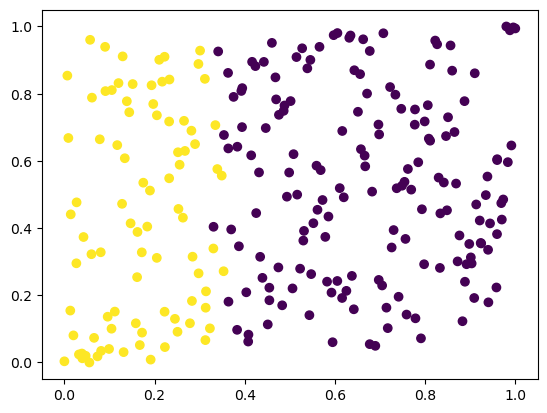

In [119]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y)

Ta thấy bây giờ dữ liệu ngoại lai sẽ ít ảnh hưởng đến kết quả hơn

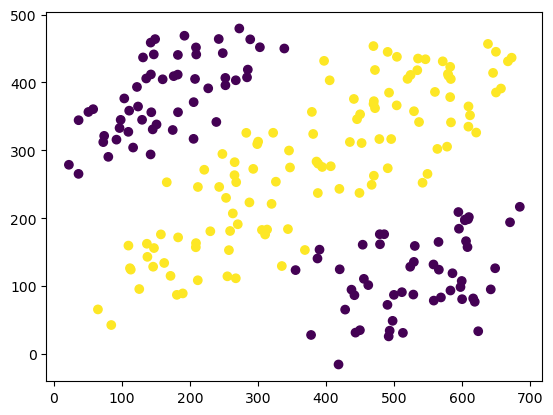

In [122]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y)

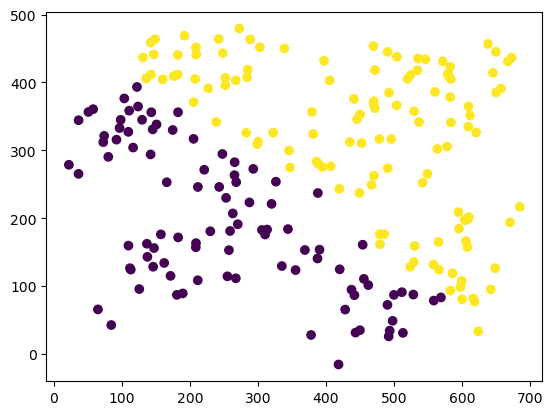

In [124]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scale', QuantileTransformer(n_quantiles = 100)), ('model', LogisticRegression())])
pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

Ta thấy mặc dù ta dùng chính dữ liệu train để làm dữ liệu test nhưng kết quả rất khác, vậy nên đây là mô hình không tốt

Ta thấy ở dữ liệu train, các biến không có mối quan hệ tuyến tính với nhau. Ta sẽ xử lí điều này bằng PolynomialFeatures

PolynomialFeatures trong thư viện sklearn là một công cụ dùng để tạo ra các đặc trưng mới bằng cách tính các đa thức của các đặc trưng hiện có. Điều này cho phép các mô hình hồi quy và phân loại khai thác mối quan hệ phi tuyến giữa các đặc trưng, giúp cải thiện độ chính xác và hiệu quả của các mô hình khi dữ liệu có các quan hệ phi tuyến.

Ví dụ, nếu bạn có 2 đặc trưng là x1, x2 PolynomialFeatures bậc 2 sẽ thêm các đặc trưng mới như sau:
+ x1
+ x2
+ x1^2
+ x1x2
+ x2^2

Sử dụng PolynomialFeatures có thể hữu ích trong nhiều trường hợp:

+ Hồi quy tuyến tính: Khi dữ liệu có mối quan hệ phi tuyến giữa các đặc trưng, việc thêm các đặc trưng đa thức có thể giúp mô hình hồi quy tuyến tính phù hợp tốt hơn với dữ liệu.
+ Tăng cường sức mạnh của mô hình đơn giản: Thêm các đặc trưng đa thức có thể giúp mô hình đơn giản như hồi quy tuyến tính hay logistic trở nên mạnh mẽ hơn trong việc bắt kịp các mối quan hệ phức tạp trong dữ liệu.

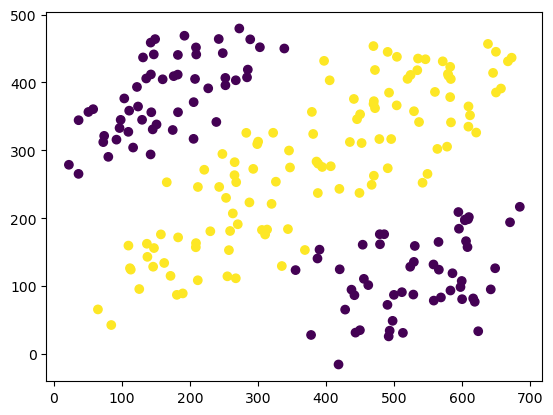

In [131]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('scale', PolynomialFeatures()), ('model', LogisticRegression())])
pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

## One-hot encoding

In [135]:
arr = np.array(['low', 'low', 'high','medium']).reshape(-1, 1)

In [163]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output = False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [171]:
enc.transform([['low']]) #đầu vào là ma trận 2 chiều

array([[0., 1., 0.]])